# Programa de la solución de las trayectorias cuánticas para el sistema de 3 niveles.
## Distribución de periodos brillantes y obscuros 
## Distrubución de tiempos de espera
## Distribución de conteo de fotones 

## Figura del proyecto


<img src="3LAkev.png" alt="a" class="bg-primary mb-1" width="400px">


In [7]:
import numpy as np
import qutip 
from qutip import *

import matplotlib.pyplot as plt
import pandas as pd
from pylab import *


### La funcion basis es para el número de estados de Fock en el espacio de Hilbert. Si es una lista, entonces el objeto resultante será un producto tensorial  sobre espacios con esas dimensiones.


In [8]:
NF=3
Kg = basis(NF,2)
Ka = basis(NF,1)
Ke = basis(NF,0)

# Estado base
psi0 = Kg 

### Para describir los estados de sistemas cuánticos multipartitos (como dos qubits acoplados, un qubit acoplado a un oscilador, etc.) necesitamos expandir el espacio de Hilbert tomando el producto tensorial de los vectores de estado para cada uno de los componentes del sistema. De manera similar, los operadores que actúan sobre los vectores de estado en el espacio de Hilbert combinado (que describe el sistema acoplado) se forman tomando el producto tensorial de los operadores individuales.

In [9]:
Aaa = Ka*Ka.dag()
Aee = Ke*Ke.dag()
Agg = Kg*Kg.dag()
Aeg = Ke*Kg.dag()
Aag = Ka*Kg.dag()
Aea = Ke*Ka.dag()
Aae = Ka*Ke.dag()
Aga = Kg*Ka.dag()
Age = Kg*Ke.dag()

#Valores esperados
ket_a = Aaa #Definiendo los valores esperados con la diagonal principal
ket_e = Aee
ket_g = Agg

expect_values = [Aaa,
Aee,
Agg] #Los valores esperados se ponen en forma de lista, no se si importe su orden


### Parametros del experimento. 

In [11]:
Omega = 2 #Frecuencia de rabi
Delta = 0 #Desintonia
deltat =10000000
ga = 0.015 
gd = 0.05
g = 0.95
ntraj = 1 # Numero de trayectorias 
tlist = np.linspace(0,1000000,deltat)

#El numero de trayectorias necesarias para ver periodos brillantes y obscuros tiene que ser 1 
#De lo contrario como ensamble no se ve porque en el mismo coinciden periodos brillantes con los obscuros de otros 
#Esta parpadeo es caracteristico de puntos cuanticos, átomos y algunas moleculas 

### Operadores de colapso

In [12]:
# Operadores de colapso
Ceg = np.sqrt(g)*Age 
Cea = np.sqrt(gd)*Aae
Cag = np.sqrt(ga)*Aga
collapse = [Ceg ,Cea, Cag] #Ceg colapso 0, Cea colapso 1, Cag colapso 2


### Hamiltoniano

In [13]:
#Hamiltoniano del sistema, no se le añaden los terminos de los colapsos porque el programa de la solucion de montecarlo
#lo hace en automatico  con la funcion de liuvillian(H)
H = Delta * Aee + 0.5 * Omega * (Aeg + Age)

### Metodo de montecarlo para resolver las trayectorias cuanticas-

In [14]:

MC = mcsolve(H, psi0, tlist, collapse, expect_values, 1,
             options={'num_cpus': 6})  # Pasar las opciones como diccionario

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time: 1388.07s


In [15]:
collapse = MC.col_which;
times = MC.col_times;
collapse_list = list(zip(collapse[0], times[0]))
lc=collapse_list
data = pd.DataFrame(collapse_list, columns=['colapso','tiempo'])
a=data[data['colapso']==2]
b=data[data['colapso']==1]
c=data[data['colapso']==0]

tamax=len(lc)


## Distribución de periodos brillantes y obscuros 

In [16]:
# Tiempo en el que ocurren los periodos oscuros
tod=0
toscuro=0
cnt=0
tdur=[]
tbdur=[]
tiempos=[]
tiemposb=[]
a=0
for i in lc:
    if lc[cnt][0] == 1 and cnt<tamax-2:
        tb=lc[cnt][1]-lc[a][1]
        tbdur.append(tb)
        tbrillante=tb
        tiemposb.append(lc[a][1])
        
        tod=lc[cnt+2][1]-lc[cnt][1]
        toscuro=toscuro+tod
        tdur.append(tod) 
        tdo=lc[cnt][1]+lc[cnt+2][1]
        tiempos.append(tdo*0.5)
        a=cnt
    cnt=cnt+1
tiempos.pop(0) 
tdur.pop(0) 
tiempos.pop(len(tiempos)-1) 
tdur.pop(len(tdur)-1) 

tiemposb.pop(0) 
tbdur.pop(0) 
tiemposb.pop(len(tiempos)-1) 
tbdur.pop(len(tdur)-1) 



207.75287211860996

In [17]:
collapse = MC.col_which
times = MC.col_times
collapse_list = list(zip(collapse[0], times[0]))
lc = collapse_list
data = pd.DataFrame(collapse_list, columns=['colapso', 'tiempo'])

tamax = len(lc)

# Inicialización de variables
tod = 0
toscuro = 0
cnt = 0
tdur = []
tbdur = []
tiempos = []
tiemposb = []

a = 0  # Inicialización del índice

# Bucle para calcular los tiempos brillantes y oscuros
for i in lc:
    if lc[cnt][0] == 1 and cnt < tamax - 2:
        tb = lc[cnt][1] - lc[a][1]
        tbdur.append(tb)
        tiemposb.append(lc[a][1])

        if cnt + 2 < tamax:  # Validación para evitar índices fuera de rango
            tod = lc[cnt + 2][1] - lc[cnt][1]
            toscuro = toscuro + tod
            tdur.append(tod)
            tdo = lc[cnt][1] + lc[cnt + 2][1]
            tiempos.append(tdo * 0.5)
        a = cnt  # Actualizamos el índice de referencia
    cnt += 1

# Eliminar el primer y último elemento solo si las listas no están vacías
if len(tiempos) > 1:
    tiempos.pop(0)
    tiempos.pop(len(tiempos) - 1)

if len(tdur) > 1:
    tdur.pop(0)
    tdur.pop(len(tdur) - 1)

if len(tiemposb) > 1:
    tiemposb.pop(0)
    tiemposb.pop(len(tiemposb) - 1)

if len(tbdur) > 1:
    tbdur.pop(0)
    tbdur.pop(len(tbdur) - 1)


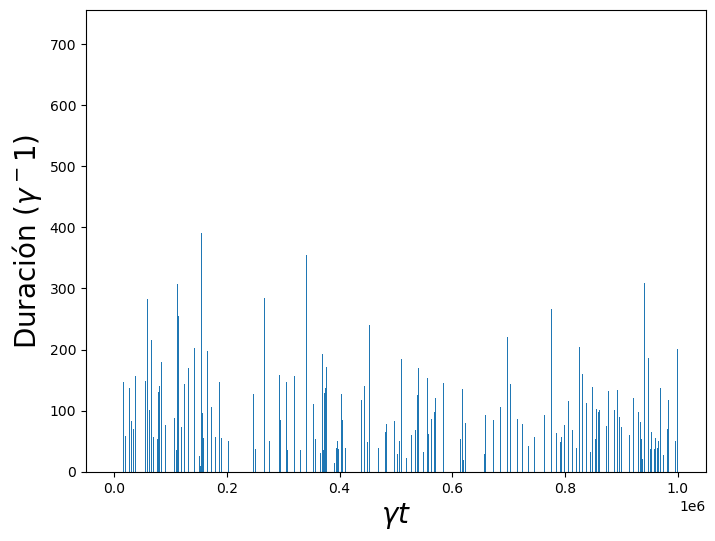

In [18]:
plt.figure(figsize=(8,6))
plt.bar(tiemposb,tbdur, label =r'tiempo en el que ocurre un periodo brillante',width=30)
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Duración ($\gamma^-1$)',fontsize=20)
tbrill=10000-toscuro

(0.0, 400.0)

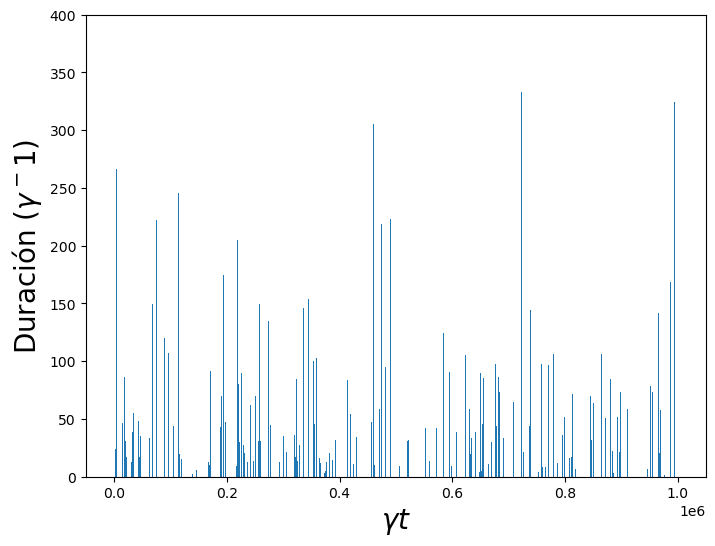

In [19]:
plt.figure(figsize=(8,6))
plt.bar(tiempos,tdur, label =r'tiempo en el que ocurre un periodo oscuro',width=30)
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Duración ($\gamma^-1$)',fontsize=20)
tbrill=10000-toscuro
plt.ylim(0,400)


Text(0, 0.5, 'Número de periodos oscuros')

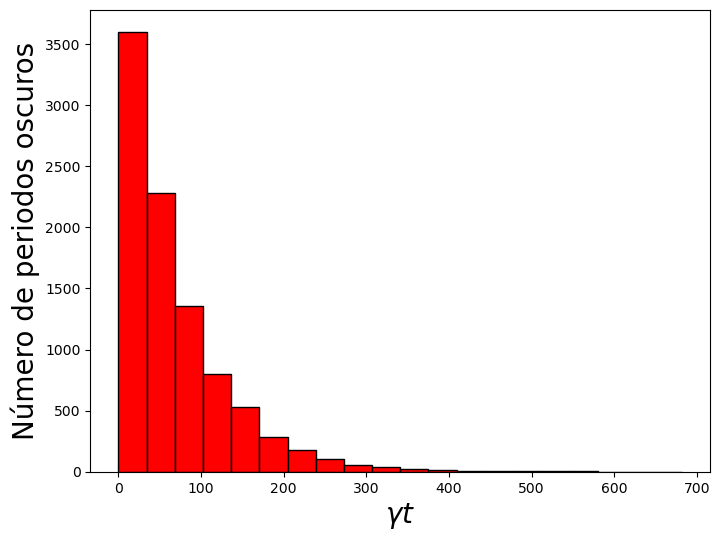

In [20]:
# Histograma de la duracion de periodos oscuros
plt.figure(figsize=(8,6))
plt.hist(tdur,20,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='red')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel('Número de periodos oscuros',fontsize=20)

Text(0, 0.5, 'Número de periodos oscuros')

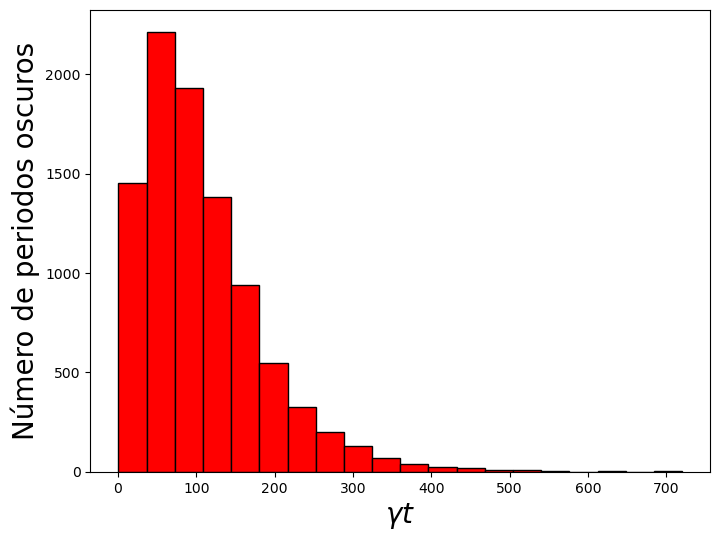

In [21]:
# Histograma de la duracion de periodos brillantes
plt.figure(figsize=(8,6))
plt.hist(tbdur,20,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='red')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel('Número de periodos oscuros',fontsize=20)

68.38410460303805
66.66666666666667


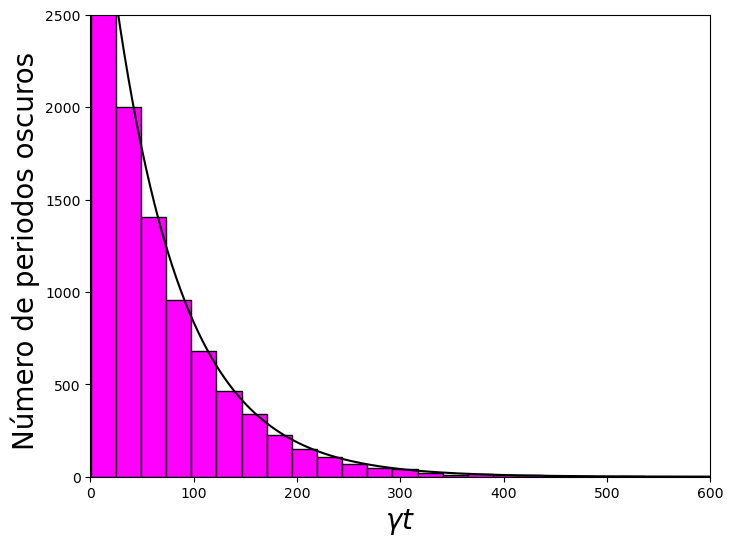

In [22]:
'''
Comparacion de los periodos brillantes y oscuros medidos con los de las formulas
Omega = 1 #Frecuencia de rabi
Delta = 0 #Desintonia
ga = 0.015 
gd = 0.05
g = 0.935
tlist
'''

#Promedio periodos oscuros
tlis = np.linspace(0,800,950)
a=np.mean(tdur)
Toc=1/ga
TBc=(2*Omega**3+g**2+4*Delta**2)/(gd*Omega**2)
POc=(250000)*(1/Toc)*exp(-tlis/Toc)
PBc=(1/Toc)*exp(-tlis/TBc)
plt.figure(figsize=(8,6))
plt.plot(tlis,POc,color="black")
plt.hist(tdur,bins=28,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='magenta')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Número de periodos oscuros ',fontsize=20)
plt.xlim(0,600)
plt.ylim(0,2500)
print(a)
print(Toc)


9292


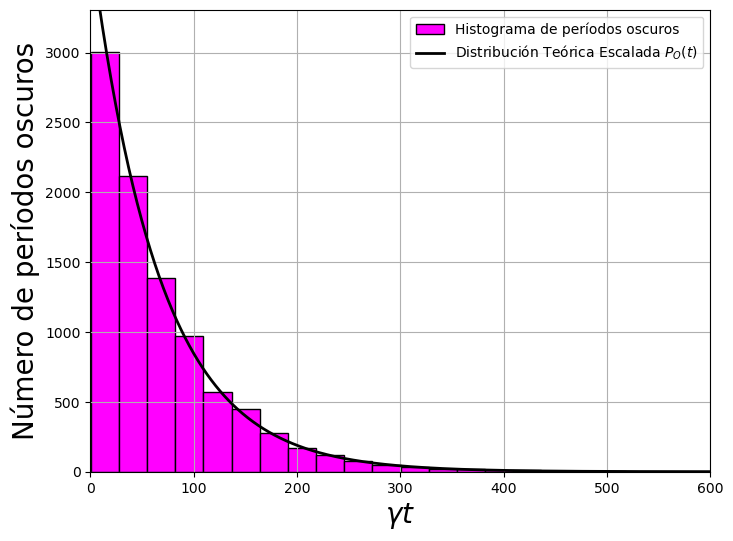

In [23]:
import numpy as np
import matplotlib.pyplot as plt


# Número total de períodos oscuros
N = len(tdur)
print(N)
# Crear el histograma para obtener el ancho de los bins
counts, bin_edges = np.histogram(tdur, bins=25)
bin_width = bin_edges[1] - bin_edges[0]


# Duración promedio teórica del período oscuro
Toc = 1 / ga

# Rango de tiempo para la curva teórica
tlis = np.linspace(0, 800, 950)

# Distribución teórica escalada para el histograma
POc = (1 / Toc) * np.exp(-tlis / Toc)
POc_scaled = N * bin_width * POc  # Factor de escala correcto

# Graficar
plt.figure(figsize=(8,6))
plt.hist(tdur, bins=25, histtype='barstacked', rwidth=1, edgecolor='black', color='magenta', label='Histograma de períodos oscuros')
plt.plot(tlis, POc_scaled, color="black", linewidth=2, label='Distribución Teórica Escalada $P_O(t)$')
plt.xlabel(r'$\gamma t$', fontsize=20)
plt.ylabel('Número de períodos oscuros', fontsize=20)
plt.xlim(0, 600)
plt.ylim(0, max(counts) * 1.1)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(N)

In [ ]:
'''
Comparacion de los periodos brillantes y oscuros medidos con los de las formulas
Omega = 1 #Frecuencia de rabi
Delta = 0 #Desintonia
ga = 0.015 
gd = 0.05
g = 0.935
tlist
'''

#Promedio periodos oscuros
tlis = np.linspace(0,800,950)
a=np.mean(tdur)
Toc=1/ga
TBc=(2*Omega**3+g**2+4*Delta**2)/(gd*Omega**2)
POc=(300000)*(1/Toc)*exp(-tlis/Toc)
PBc=(200000)*(1/Toc)*exp(-tlis/TBc)
plt.figure(figsize=(8,6))
plt.plot(tlis,PBc,color="black")
plt.hist(tbdur,bins=21,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='magenta')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Número de periodos brillantes ',fontsize=20)
plt.xlim(0,600)
plt.ylim(0,200)
a

## Poblaciones 

In [ ]:

plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'black')
#plt.plot(tlist,MC.expect[2], label =r'$\rho_{gg}(t)$', linestyle='dashdot',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
#plt.xlim(0,100000)
#plt.legend(loc=1, prop={'size': 25})
#plt.savefig('Fig. 2a.pdf')
#plt.show()
plt.figtext(0.5, -0.05, 
            r'Evolución temporal de la poblacion del estado exitado de 1 trayectoria '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$,$\Delta t = %i$' % (Omega, Delta, ga, gd, g,deltat), 
            ha='center', fontsize=12)
